Fake dataset shape: (23481, 4)
True dataset shape: (21417, 4)
Combined dataset shape: (44898, 5)

 First 10 rows of the combined dataset:


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake  
5  December 25, 2017  fake  
6  December 23, 2017  fake  
7  December 23, 2017  fake  
8  December 22, 2017  fake  
9  December 21, 2017  fake

Text cleaning completed!
Balanced dataset shape: (35816, 6)
label
1    17908
0    17908
Name: count, dtype: int64
TF-IDF + SVD features shape: (35816, 500)

=== Logistic Regression Performance ===
Accuracy: 0.9853433835845896
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3582
           1       0.98      0.99      0.99      3582

    accuracy                           0.99      7164
   macro avg       0.99      0.99      0.99      7164
weighted avg       0.99      0.99      0.99      7164



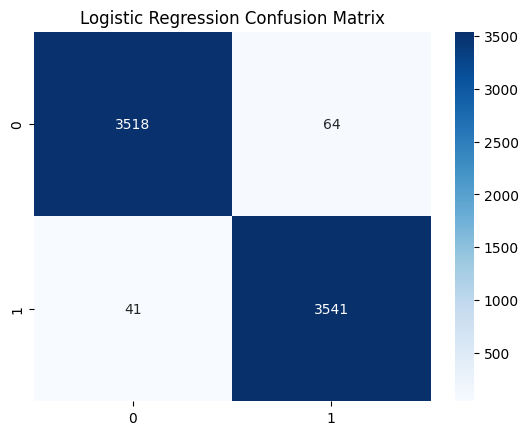


=== Random Forest Performance ===
Accuracy: 0.9441652707984366
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3582
           1       0.92      0.97      0.95      3582

    accuracy                           0.94      7164
   macro avg       0.95      0.94      0.94      7164
weighted avg       0.95      0.94      0.94      7164



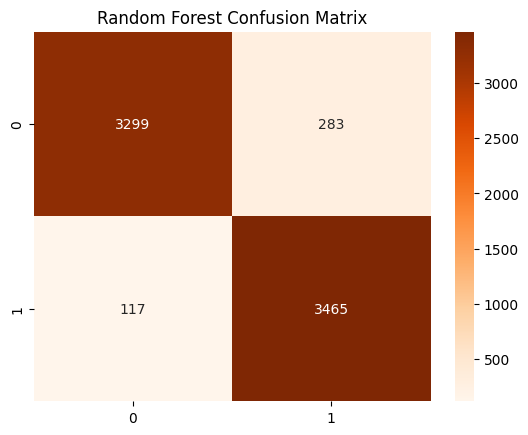


 Training Autoencoder (REAL news only)...
Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1171 - val_loss: 1.0373
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0310 - val_loss: 0.9992
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9917 - val_loss: 0.9701
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9583 - val_loss: 0.9547
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9406 - val_loss: 0.9451
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9295 - val_loss: 0.9385
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9240 - val_loss: 0.9346
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9194 - val_loss: 0.9310
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9189 - val_loss: 0.9289
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9136 - val_loss: 0.9271
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9160 - val_loss: 0.9259
Epoch 12/

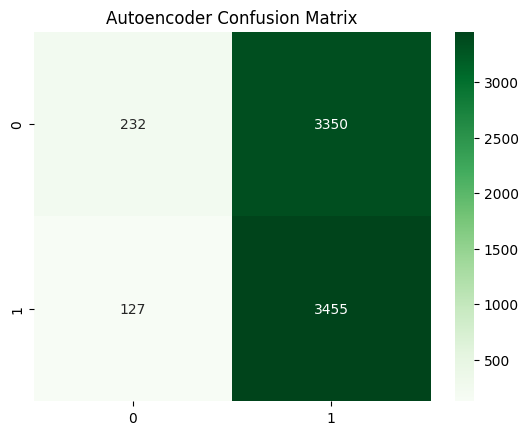

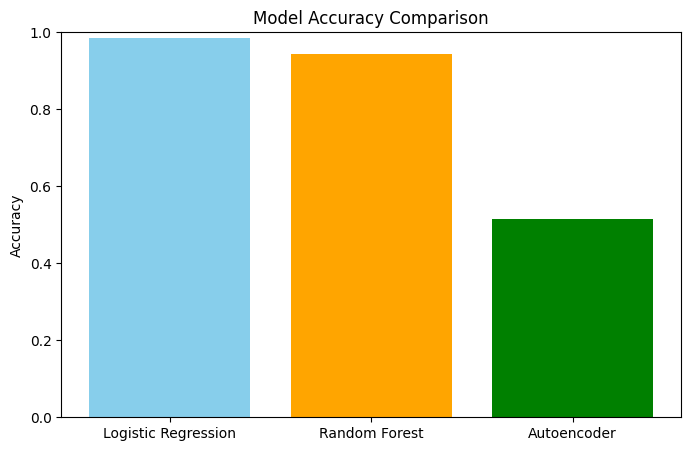


=== FINAL ACCURACY SUMMARY ===
Logistic Regression: 98.53%
Random Forest: 94.42%
Autoencoder (Anomaly Detection): 51.47%
Mean Reconstruction Error (Autoencoder): 0.920173


In [19]:

# FAKE NEWS DETECTION

# Import Required Libraries
# ============================================================
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers


# Load and Combine Datasets
# ============================================================
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

print("Fake dataset shape:", fake.shape)
print("True dataset shape:", true.shape)

# Add labels
fake["label"] = "fake"
true["label"] = "real"

# Combine both datasets
df = pd.concat([fake, true], axis=0).reset_index(drop=True)
print("Combined dataset shape:", df.shape)
print("\n First 10 rows of the combined dataset:")
display(df.head(10))




# Data Cleaning
# ============================================================
df.drop_duplicates(subset=["title", "text"], inplace=True)
df.dropna(subset=["title", "text"], inplace=True)

# Combine title + text
df["content"] = df["title"].astype(str) + " " + df["text"].astype(str)

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["content"] = df["content"].apply(clean_text)
print("Text cleaning completed!")


# Encode Labels and Balance Dataset
# ============================================================
df["label"] = df["label"].map({"fake": 0, "real": 1})

# Balance fake/real
min_count = df["label"].value_counts().min()
df_balanced = pd.concat([
    df[df["label"] == 0].sample(min_count, random_state=42),
    df[df["label"] == 1].sample(min_count, random_state=42)
])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced dataset shape:", df_balanced.shape)
print(df_balanced["label"].value_counts())


# Feature Extraction: TF-IDF + Dimensionality Reduction
# ============================================================
vectorizer = TfidfVectorizer(stop_words="english", max_features=10000)
X = vectorizer.fit_transform(df_balanced["content"])
y = df_balanced["label"]

# Reduce dimensionality for Autoencoder
svd = TruncatedSVD(n_components=500, random_state=42)
X_reduced = svd.fit_transform(X)
print("TF-IDF + SVD features shape:", X_reduced.shape)

# Train-Test Split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression Model
# ============================================================
lr = LogisticRegression(max_iter=2000, C=3, solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n=== Logistic Regression Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Model
# ============================================================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=50,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Autoencoder (Deep Learning - Anomaly Detection)
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train only on REAL news
X_real = X_train_scaled[y_train == 1]

input_dim = X_real.shape[1]
encoding_dim = 128

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print("\n Training Autoencoder (REAL news only)...")
autoencoder.fit(
    X_real, X_real,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

# Reconstruction error (to detect fake)
reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 95)
y_pred_ae = (mse < threshold).astype(int)

print("\n=== Autoencoder (Anomaly Detection) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ae))
print(classification_report(y_test, y_pred_ae))

cm_ae = confusion_matrix(y_test, y_pred_ae)
sns.heatmap(cm_ae, annot=True, fmt='d', cmap='Greens')
plt.title("Autoencoder Confusion Matrix")
plt.show()

# Accuracy Comparison
# ============================================================
models = ['Logistic Regression', 'Random Forest', 'Autoencoder']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_ae)
]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Final Summary
# ============================================================
autoencoder_mse = np.mean(mse)

print("\n=== FINAL ACCURACY SUMMARY ===")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr)*100:.2f}%")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print(f"Autoencoder (Anomaly Detection): {accuracy_score(y_test, y_pred_ae)*100:.2f}%")
print(f"Mean Reconstruction Error (Autoencoder): {autoencoder_mse:.6f}")
